In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm

In [40]:
data = pd.read_csv("StudentsPerformance.csv")

In [4]:
data.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,chd,free/reduced,none,47,57,44
1,female,chd,standard,none,71,83,78
2,male,chd,standard,none,58,54,52
3,male,chd,standard,none,40,52,43
4,female,chd,free/reduced,none,54,58,61


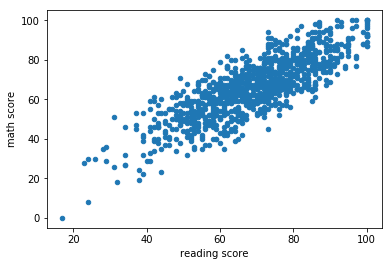

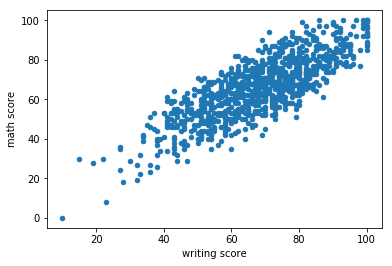

In [5]:
data.plot.scatter(x="reading score",y = "math score")
data.plot.scatter(x="writing score",y = "math score")

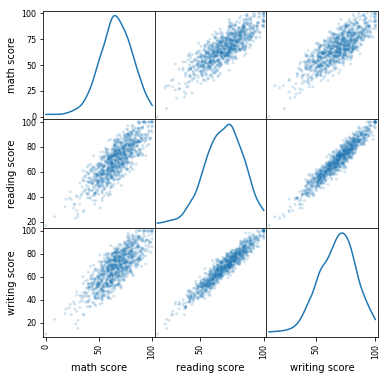

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde');

In [7]:
male = data["gender"][data["gender"] == "male"].count()
female = data["gender"][data["gender"] == "female"].count()
print(male/1000, female/1000)

0.482 0.518


In [58]:
X= data[["gender","reading score", "lunch", "writing score","parental level of education","test preparation course"]]
Y = data["math score"]
X = X.replace({"male":1,"female" : 0,"standard":1,"free/reduced":0,"chd":1,"nhd":0, "completed":1, "none":0})
X.head()


,gender,reading score,lunch,writing score,parental level of education,test preparation course
0,1,57,0,44,1,0
1,0,83,1,78,1,0
2,1,54,1,52,1,0
3,1,52,1,43,1,0
4,0,58,0,61,1,0
...,...,...,...,...,...,...
995,1,85,1,86,0,1
996,0,75,1,82,0,0
997,1,75,1,76,0,1
998,0,45,0,45,0,0


model = 

In [64]:
lr = LinearRegression()
lr.fit( X, Y)
yp = lr.predict(X)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math score   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.279e+04
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        01:13:42   Log-Likelihood:                -3169.9
No. Observations:                1000   AIC:                             6352.
Df Residuals:                     994   BIC:                             6381.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
gender                         12.0023      0.358     33.491      0.000      11.299      12.706
reading score                   0.2521      0.043      5.842      0.000       0.167       0.337
lunch                           3.4731      0.401      8.667      0.000       2.687       4.259
writing score                   0.6201      0.045     13.934      0.000       0.533       0.707
parental level of education    -0.8273      0.384     -2.153      0.032      -1.581      -0.073
test preparation course        -2.7763      0.415     -6.693      0.000      -3.590      -1.962
==============================================================================
Omnibus:                        0.120   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.072
Skew:                          -0.017   Prob(JB):                        0.965
Kurtosis:                       3.023   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

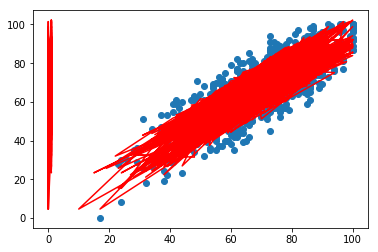

In [60]:
plt.scatter(X["reading score"],Y)
plt.plot(X,yp, color="red")
plt.show()